<a href="https://colab.research.google.com/github/surajpandey11/capstone_project2/blob/main/Suraj_Pandey_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

# New section

# New section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np


In [4]:
transport_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 1/Day 1/train_revised.csv')

In [5]:
transport_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
transport_df[transport_df['max_capacity']==11]


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
12,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11
13,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11
16,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11
17,5792,1,Mpesa,8D9V8HK2FC,20-04-18,5:50,Kisii,Nairobi,shuttle,11
18,5793,1,Mpesa,TTZQDYZHAB,20-04-18,10:58,Kisii,Nairobi,shuttle,11
...,...,...,...,...,...,...,...,...,...,...
51107,13761,2,Mpesa,VCDOGNVTG2,27-11-17,5:00,Kisii,Nairobi,shuttle,11
51156,13769,5,Mpesa,PU4LHLHZVC,19-04-18,6:20,Kijauri,Nairobi,shuttle,11
51195,13761,1,Mpesa,AQGYCPOGLQ,27-11-17,5:00,Kisii,Nairobi,shuttle,11
51468,13804,5,Mpesa,D8LAUAHLFB,20-04-18,7:50,Kijauri,Nairobi,shuttle,11


In [7]:
transport_df['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [8]:
transport_df['car_type'].value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [9]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


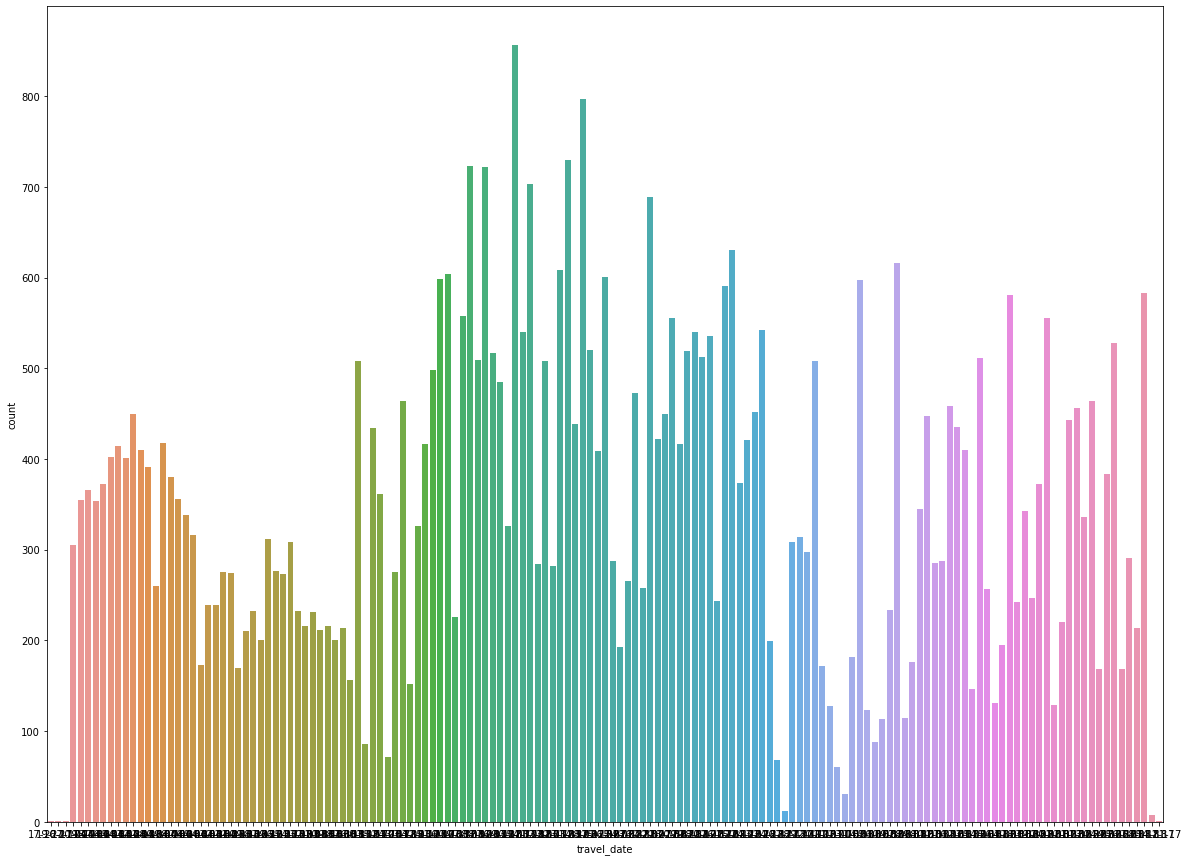

In [10]:
plt.figure(figsize=(20,15))
sns.countplot(transport_df['travel_date'])


In [11]:
transport_df['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [12]:
transport_df['travel_date'].value_counts()

10-12-17    856
14-12-17    797
13-12-17    730
07-12-17    723
08-12-17    722
           ... 
25-12-17      8
17-10-17      1
19-11-17      1
14-11-17      1
26-11-17      1
Name: travel_date, Length: 149, dtype: int64

In [17]:
pd.set_option('display.max_rows', 20)

In [18]:
transport_df['ride_id'].value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
         ..
5804      1
9834      1
9738      1
11755     1
6147      1
Name: ride_id, Length: 6249, dtype: int64

In [19]:
transport_df[transport_df['ride_id']==8454]   

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
14020,8454,18A,Mpesa,RPOXVAJVME,09-01-18,7:00,Sirare,Nairobi,Bus,49
14021,8454,17A,Mpesa,MLT0APU7IV,09-01-18,7:00,Sirare,Nairobi,Bus,49
14022,8454,12B,Mpesa,VMWIO5SZRU,09-01-18,7:00,Sirare,Nairobi,Bus,49
14023,8454,12A,Mpesa,VYZXWTUEAX,09-01-18,7:00,Sirare,Nairobi,Bus,49
14026,8454,10A,Mpesa,LJVXBMLNW6,09-01-18,7:00,Sirare,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
14082,8454,23B,Mpesa,EASA6CO68V,09-01-18,7:00,Sirare,Nairobi,Bus,49
14083,8454,25,Mpesa,QVGTOO3KD2,09-01-18,7:00,Sirare,Nairobi,Bus,49
14136,8454,4B,Mpesa,RUECUSXM5D,09-01-18,7:00,Sirare,Nairobi,Bus,49
14137,8454,23B,Mpesa,BELLA76ECM,09-01-18,7:00,Sirare,Nairobi,Bus,49


In [20]:
transport_df[transport_df['ride_id']==8090 ] 

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
11418,8090,1A,Mpesa,GU2VNYR9EK,27-12-17,7:08,Migori,Nairobi,Bus,49
11419,8090,2A,Mpesa,YSJU49YMFQ,27-12-17,7:08,Migori,Nairobi,Bus,49
11448,8090,24B,Mpesa,4DUHSCRZLT,27-12-17,7:08,Migori,Nairobi,Bus,49
11452,8090,16A,Mpesa,G1Z2ERJN1I,27-12-17,7:08,Migori,Nairobi,Bus,49
11458,8090,16B,Mpesa,ND7JR5AI0G,27-12-17,7:08,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
11624,8090,5B,Mpesa,IPX37IUQVN,27-12-17,7:08,Migori,Nairobi,Bus,49
11625,8090,6A,Mpesa,UXVBQB82UP,27-12-17,7:08,Migori,Nairobi,Bus,49
11626,8090,4A,Mpesa,XNMISHR19T,27-12-17,7:08,Migori,Nairobi,Bus,49
11627,8090,3A,Mpesa,ZA6YFKNTG0,27-12-17,7:08,Migori,Nairobi,Bus,49


In [13]:
transport_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

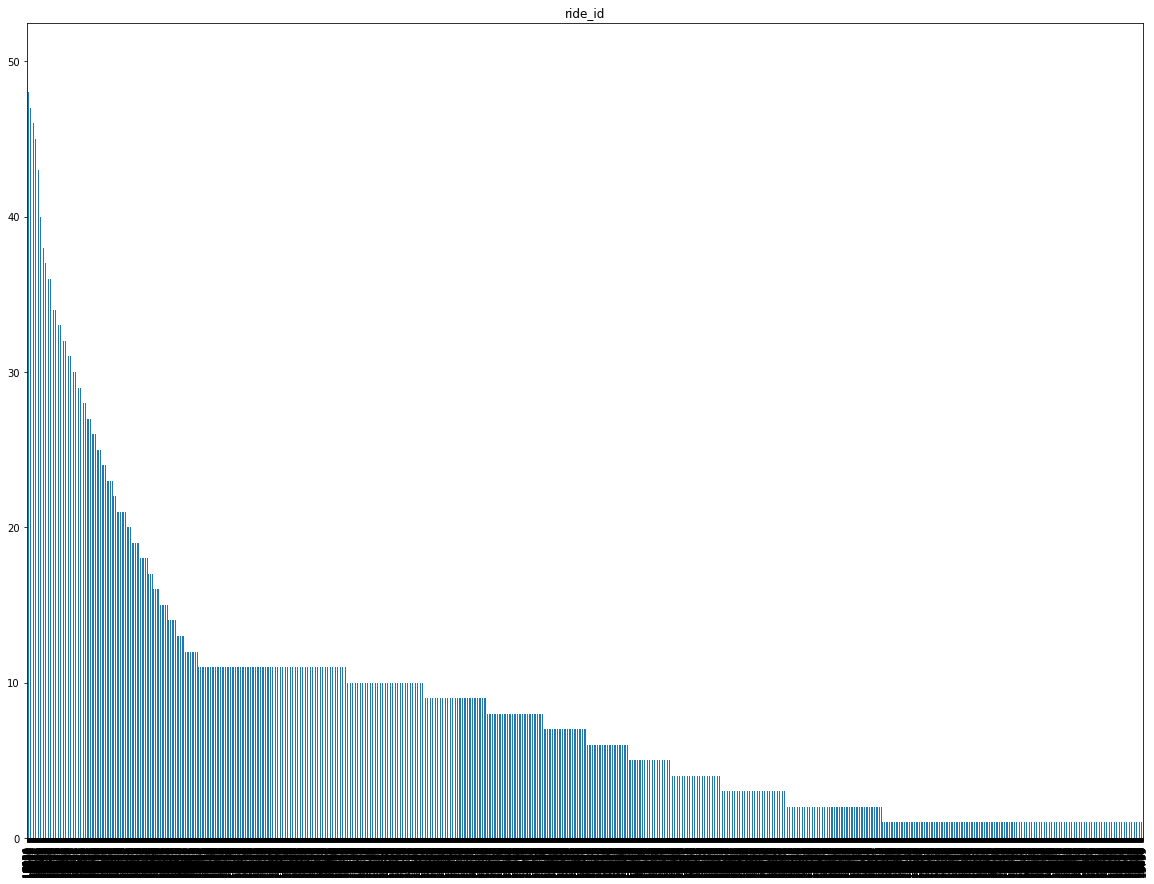

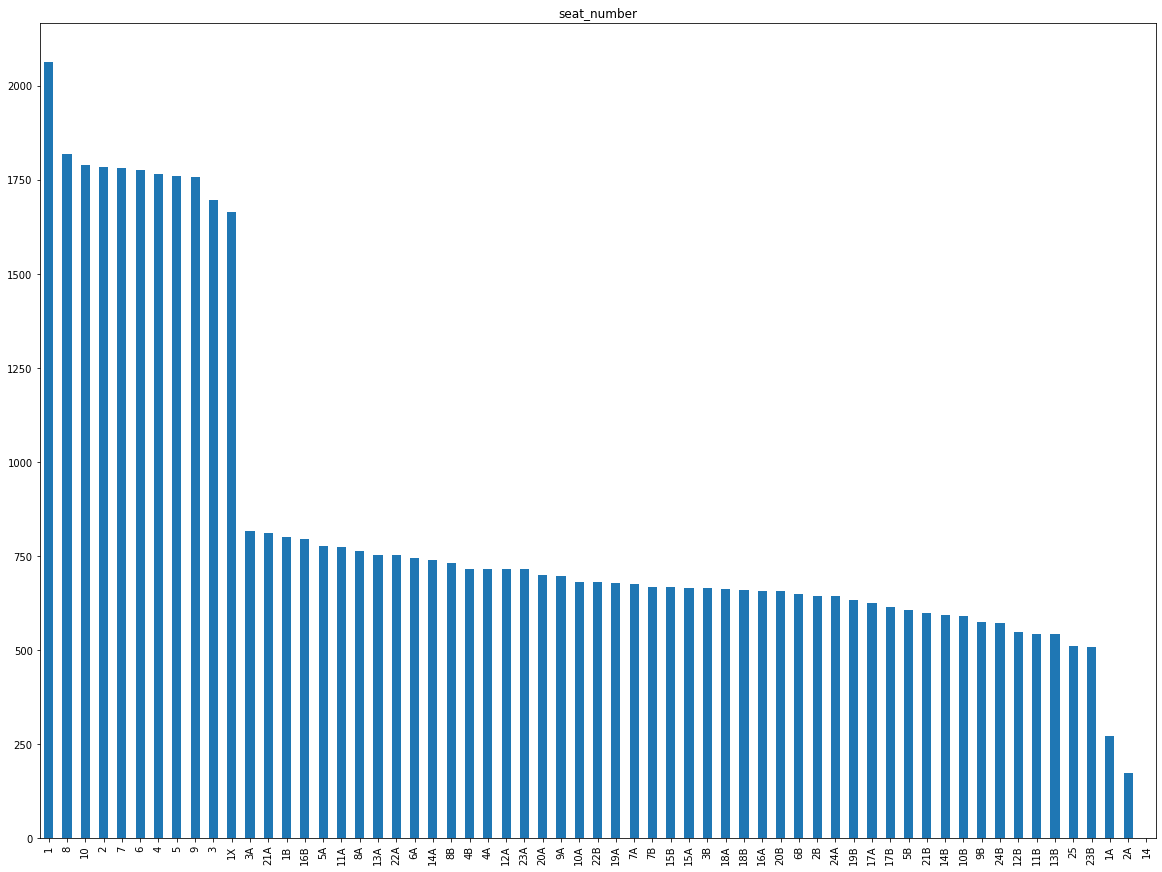

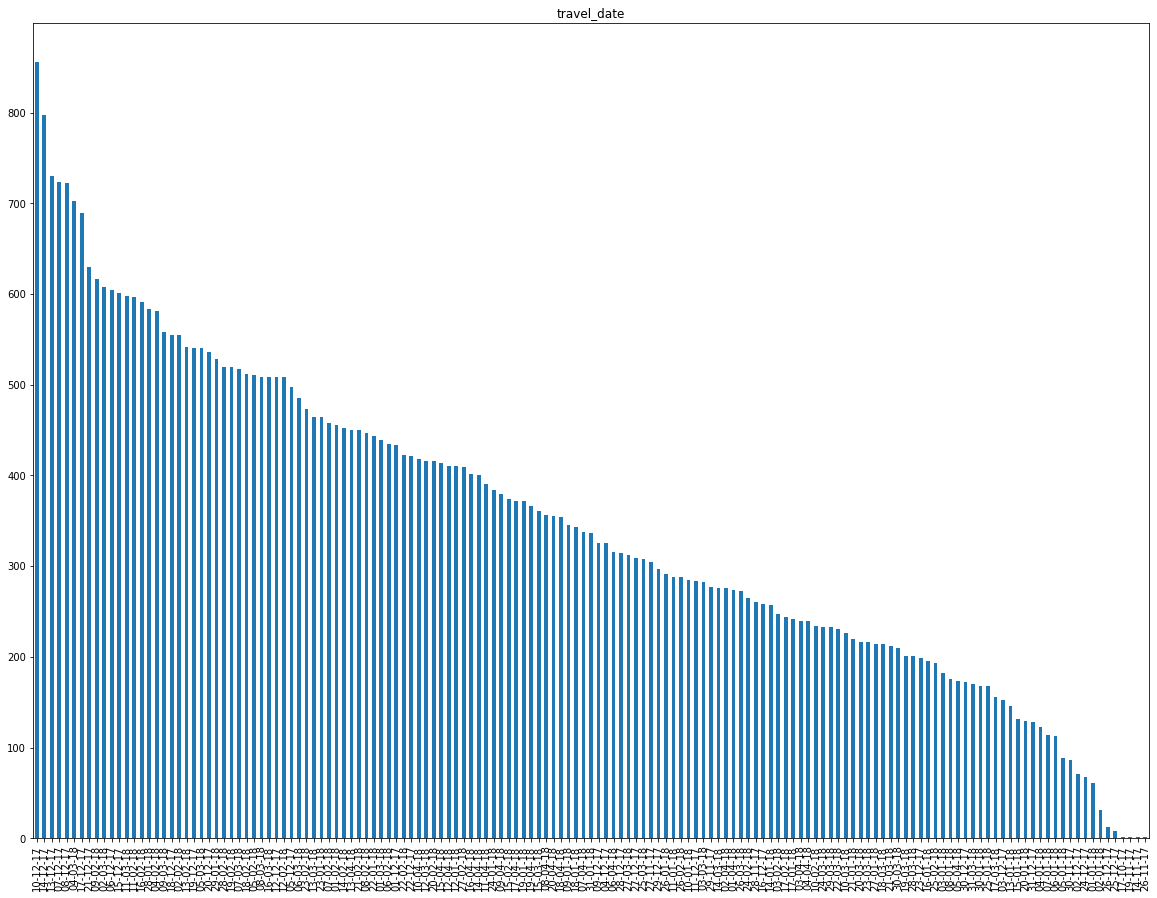

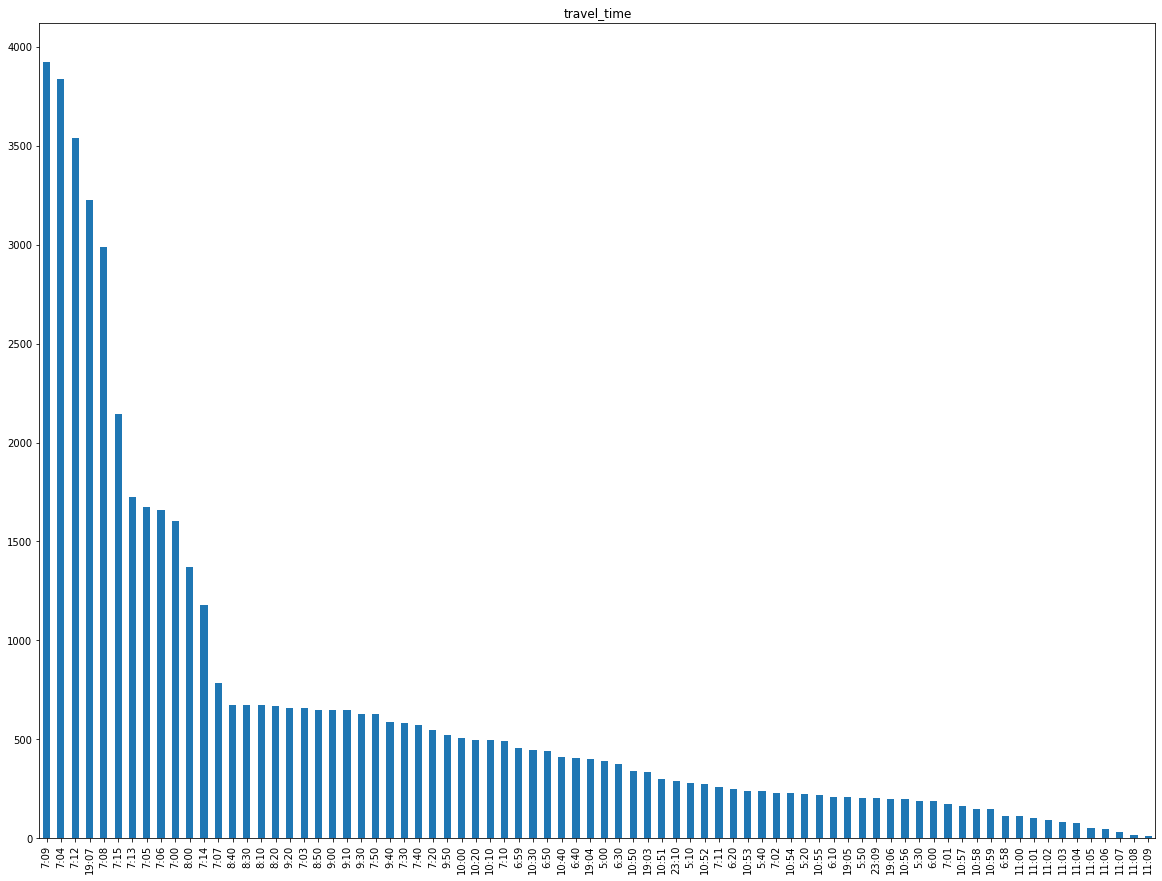

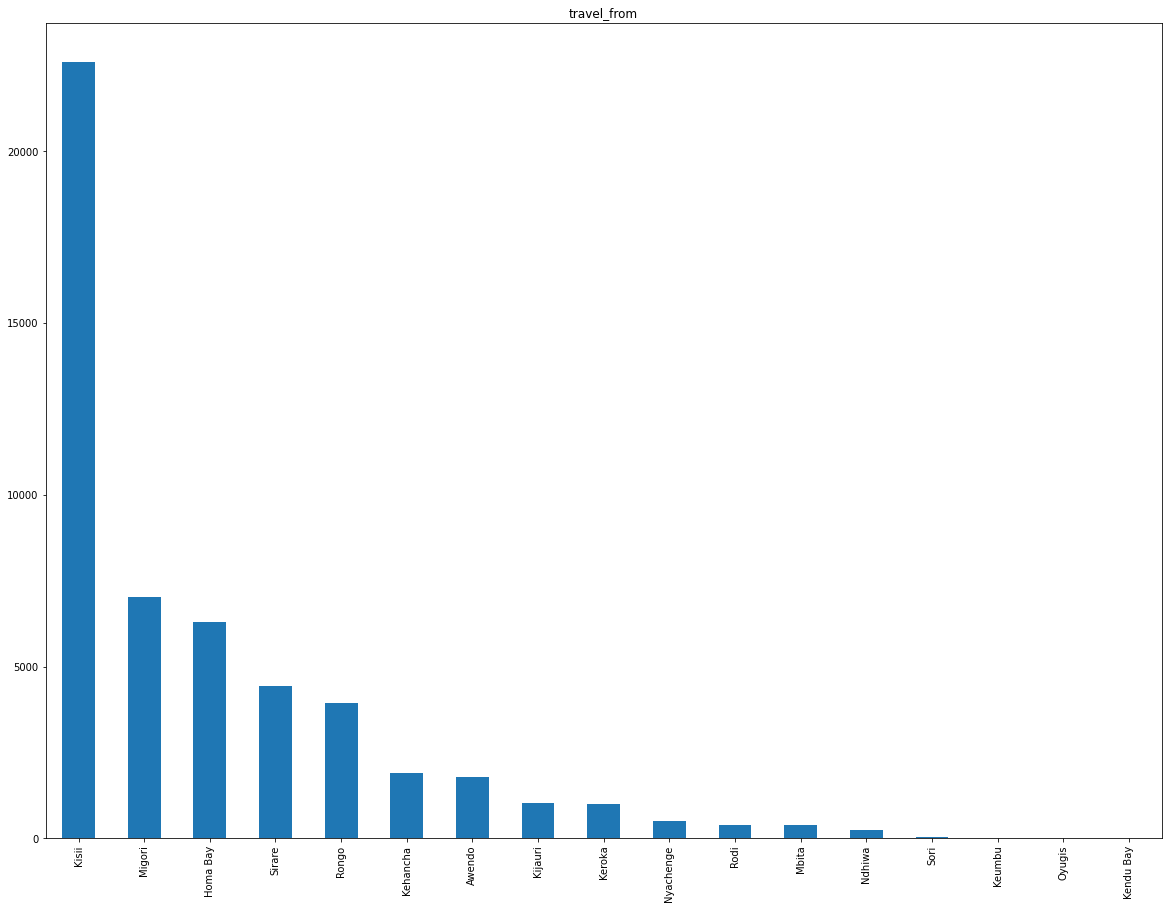

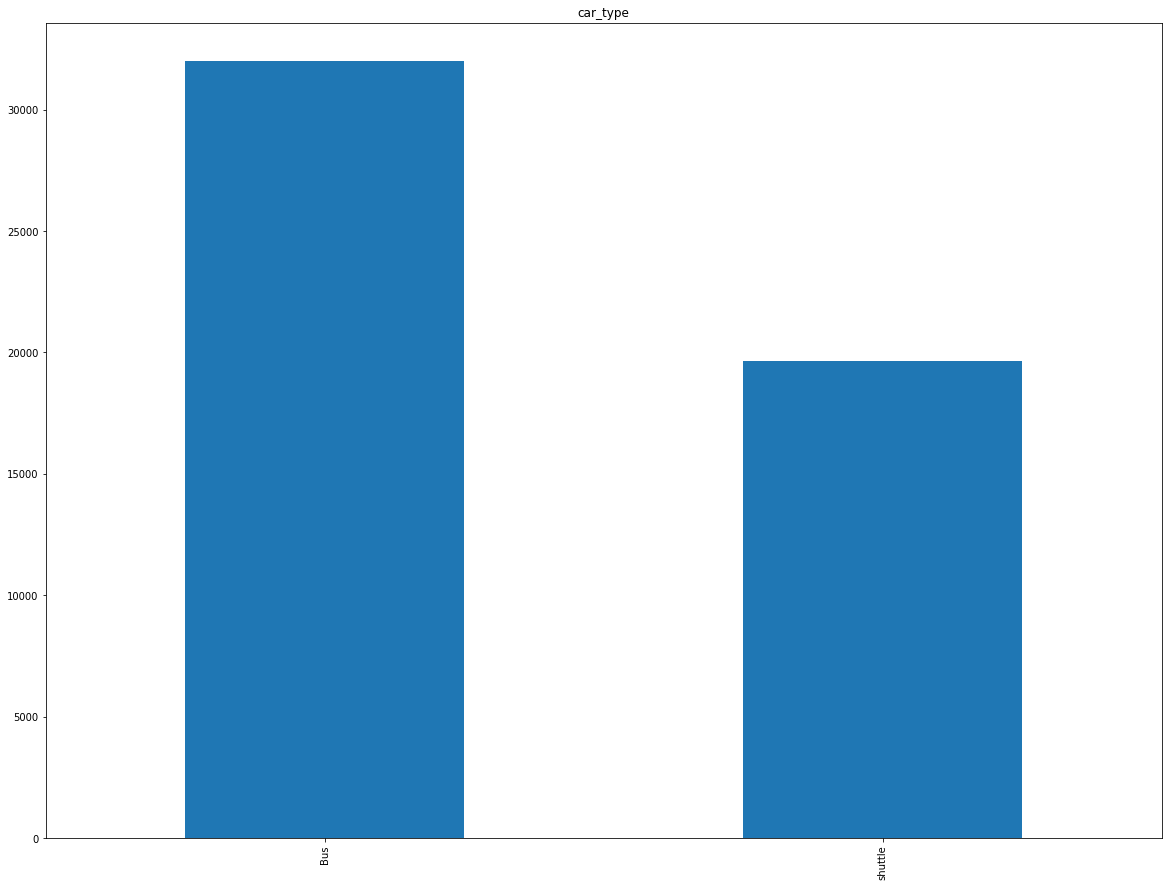

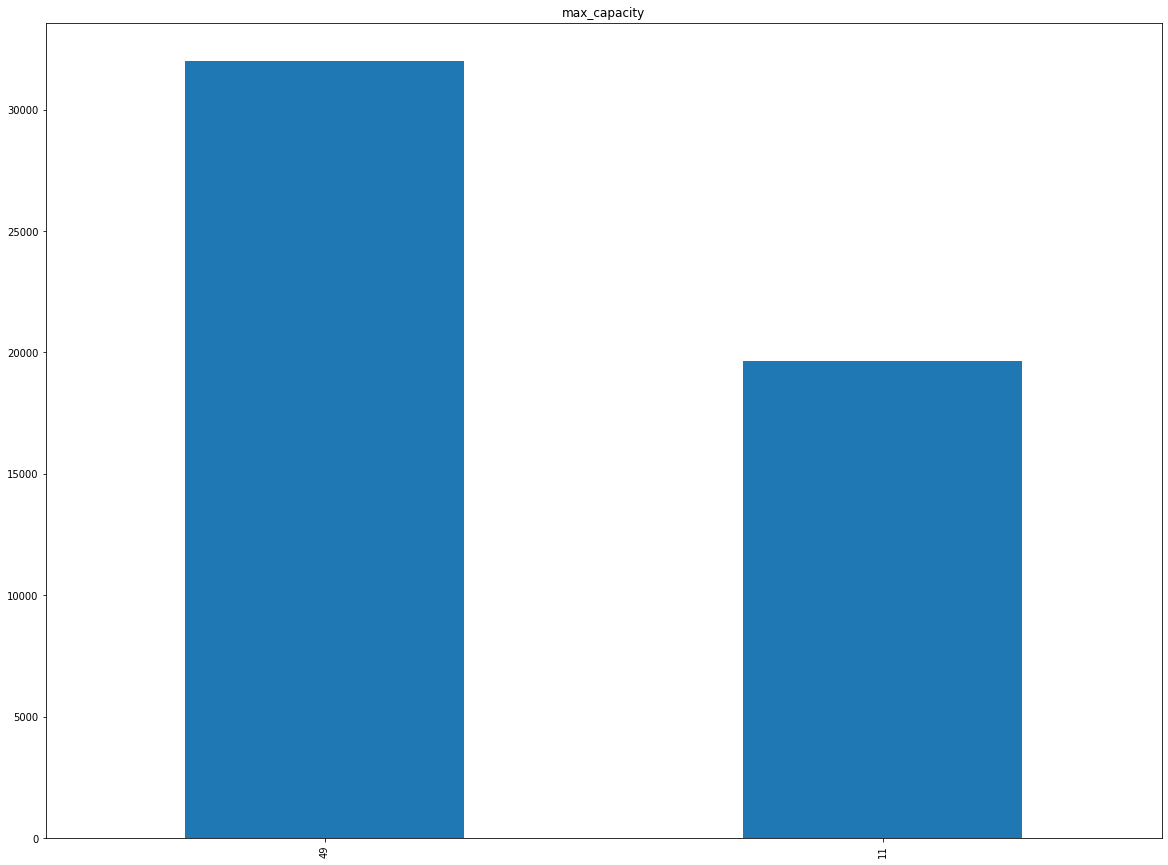

In [14]:
count=0
for element in ['ride_id', 'seat_number',
       'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity']:
  count=count+1
  plt.figure(count)
  plt.subplots(figsize=(20,15))
  transport_df[element].value_counts().plot(kind='bar')
  plt.xticks(rotation='vertical')
  plt.title(element)

In [15]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [16]:
transport_df=transport_df.groupby('ride_id', as_index=False).agg(list)

In [17]:
def len_of_mpesa(y):
  
   
  return len(y)

In [18]:
transport_df['ticket']=transport_df.apply(lambda x:len_of_mpesa(x['payment_method']),axis=1)

In [19]:
transport_df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,ticket
0,1442,[15A],[Mpesa],[UZUEHCBUSO],[17-10-17],[7:15],[Migori],[Nairobi],[Bus],[49],1
1,5437,[14A],[Mpesa],[TIHLBUSGTE],[19-11-17],[7:12],[Migori],[Nairobi],[Bus],[49],1
2,5710,[8B],[Mpesa],[EQX8Q5G19O],[26-11-17],[7:05],[Keroka],[Nairobi],[Bus],[49],1
3,5777,"[19A, 18B, 14A, 15B, 16B]","[Mpesa, Mpesa, Mpesa, Mpesa, Mpesa]","[SGP18CL0ME, B6PBDU30IZ, MZHGDGS6QZ, 7C7P3D5AJ...","[27-11-17, 27-11-17, 27-11-17, 27-11-17, 27-11...","[7:10, 7:10, 7:10, 7:10, 7:10]","[Homa Bay, Homa Bay, Homa Bay, Homa Bay, Homa ...","[Nairobi, Nairobi, Nairobi, Nairobi, Nairobi]","[Bus, Bus, Bus, Bus, Bus]","[49, 49, 49, 49, 49]",5
4,5778,"[11A, 25, 21B, 3A, 23A, 9A, 24B, 23B, 13B, 22A...","[Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpe...","[BM97HFRGL9, MYVTYFNXDZ, TE1WYK1NYE, JDD4ZL64L...","[27-11-17, 27-11-17, 27-11-17, 27-11-17, 27-11...","[7:12, 7:12, 7:12, 7:12, 7:12, 7:12, 7:12, 7:1...","[Migori, Migori, Migori, Migori, Migori, Migor...","[Nairobi, Nairobi, Nairobi, Nairobi, Nairobi, ...","[Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...",31
5,5781,"[22A, 18B, 17B, 18A, 19A, 20A, 21B, 22B, 25, 2...","[Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpesa, Mpe...","[VGG7Q3MVJX, YJ7JFHOGKA, 4JQOSC881A, KP4YUALFX...","[27-11-17, 27-11-17, 27-11-17, 27-11-17, 27-11...","[7:09, 7:09, 7:09, 7:09, 7:09, 7:09, 7:09, 7:0...","[Homa Bay, Homa Bay, Homa Bay, Homa Bay, Homa ...","[Nairobi, Nairobi, Nairobi, Nairobi, Nairobi, ...","[Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, Bus, ...","[49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 4...",26
6,5784,[1X],[Mpesa],[3OPU23FHRB],[20-04-18],[5:10],[Kisii],[Nairobi],[shuttle],[11],1
7,5789,[1X],[Mpesa],[BPRX4UMFFN],[20-04-18],[9:50],[Kisii],[Nairobi],[shuttle],[11],1
8,5790,"[1B, 4A]","[Mpesa, Mpesa]","[DC8ABRSXXK, F8VBKYCXPL]","[20-04-18, 20-04-18]","[7:06, 7:06]","[Kisii, Kisii]","[Nairobi, Nairobi]","[Bus, Bus]","[49, 49]",2
9,5791,[1],[Mpesa],[HGQURN0SZS],[20-04-18],[6:00],[Kisii],[Nairobi],[shuttle],[11],1


In [20]:
def set_element(X):
  a=X[0]
  for elem in X:
    if elem==a:
      return elem
    else:
      return X


In [21]:
for element in ['payment_method','travel_from','travel_to','car_type','max_capacity','travel_date','travel_time']:

  transport_df[element]=transport_df.apply(lambda x:set_element(x[element]),axis=1)

In [22]:
transport_df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,ticket
0,1442,[15A],Mpesa,[UZUEHCBUSO],17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,[14A],Mpesa,[TIHLBUSGTE],19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,[8B],Mpesa,[EQX8Q5G19O],26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,"[19A, 18B, 14A, 15B, 16B]",Mpesa,"[SGP18CL0ME, B6PBDU30IZ, MZHGDGS6QZ, 7C7P3D5AJ...",27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,"[11A, 25, 21B, 3A, 23A, 9A, 24B, 23B, 13B, 22A...",Mpesa,"[BM97HFRGL9, MYVTYFNXDZ, TE1WYK1NYE, JDD4ZL64L...",27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,"[22A, 18B, 17B, 18A, 19A, 20A, 21B, 22B, 25, 2...",Mpesa,"[VGG7Q3MVJX, YJ7JFHOGKA, 4JQOSC881A, KP4YUALFX...",27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,[1X],Mpesa,[3OPU23FHRB],20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,[1X],Mpesa,[BPRX4UMFFN],20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,"[1B, 4A]",Mpesa,"[DC8ABRSXXK, F8VBKYCXPL]",20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,[1],Mpesa,[HGQURN0SZS],20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [23]:
transport_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          6249 non-null   int64 
 1   seat_number      6249 non-null   object
 2   payment_method   6249 non-null   object
 3   payment_receipt  6249 non-null   object
 4   travel_date      6249 non-null   object
 5   travel_time      6249 non-null   object
 6   travel_from      6249 non-null   object
 7   travel_to        6249 non-null   object
 8   car_type         6249 non-null   object
 9   max_capacity     6249 non-null   int64 
 10  ticket           6249 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 585.8+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


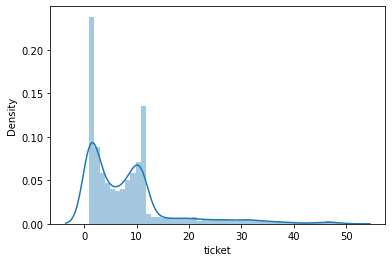

In [24]:
sns.distplot(transport_df['ticket'])

In [25]:
transport_df['day'] = pd.DatetimeIndex(transport_df['travel_date']).day
transport_df['year'] = pd.DatetimeIndex(transport_df['travel_date']).year
transport_df['month'] = pd.DatetimeIndex(transport_df['travel_date']).month

In [26]:
transport_df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,ticket,day,year,month
0,1442,[15A],Mpesa,[UZUEHCBUSO],17-10-17,7:15,Migori,Nairobi,Bus,49,1,17,2017,10
1,5437,[14A],Mpesa,[TIHLBUSGTE],19-11-17,7:12,Migori,Nairobi,Bus,49,1,19,2017,11
2,5710,[8B],Mpesa,[EQX8Q5G19O],26-11-17,7:05,Keroka,Nairobi,Bus,49,1,26,2017,11
3,5777,"[19A, 18B, 14A, 15B, 16B]",Mpesa,"[SGP18CL0ME, B6PBDU30IZ, MZHGDGS6QZ, 7C7P3D5AJ...",27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,27,2017,11
4,5778,"[11A, 25, 21B, 3A, 23A, 9A, 24B, 23B, 13B, 22A...",Mpesa,"[BM97HFRGL9, MYVTYFNXDZ, TE1WYK1NYE, JDD4ZL64L...",27-11-17,7:12,Migori,Nairobi,Bus,49,31,27,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,20113,"[2, 4, 3, 8, 10, 9, 5, 1, 7]",Mpesa,"[DJKW1CFQ6X, GFWRLGQMYF, OUWQXRWWNZ, M7ERODIZH...",07-02-18,7:00,Kisii,Nairobi,shuttle,11,9,2,2018,7
6245,20114,"[19A, 1B, 8A, 7A]",Mpesa,"[ADPXORAAJH, JC859BFPRI, 0IYLH4FXBF, SMFWRADOYR]",12-12-17,7:10,Kisii,Nairobi,Bus,49,4,12,2017,12
6246,20115,"[3, 2, 10, 4, 1]",Mpesa,"[S3VPRF5XX7, UBXFINPUSN, LLS9SJZO1E, LIRY6BWXQ...",06-12-17,7:10,Kisii,Nairobi,shuttle,11,5,12,2017,6
6247,20116,[6],Mpesa,[EZHIPJIS2T],27-11-17,7:10,Kisii,Nairobi,shuttle,11,1,27,2017,11


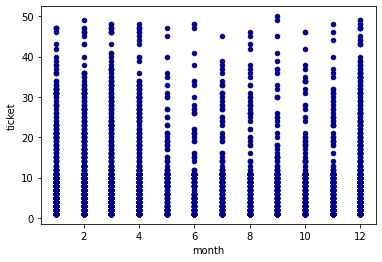

In [42]:
ax1 = transport_df.plot.scatter(y='ticket',
                      x='month',
                       c='DarkBlue')

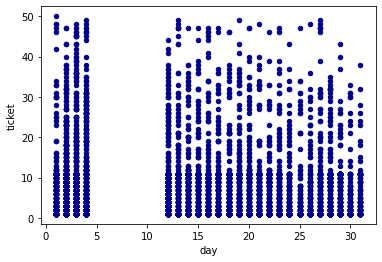

In [27]:
ax2 = transport_df.plot.scatter(y='ticket',
                      x='day',
                       c='DarkBlue')

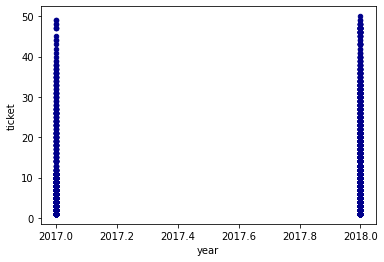

In [28]:
ax2 = transport_df.plot.scatter(y='ticket',
                      x='year',
                       c='DarkBlue')

In [29]:
transport_df.drop(columns=['payment_receipt','payment_method','seat_number','travel_to'])

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,ticket,day,year,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,17,2017,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,19,2017,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,26,2017,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,27,2017,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,27,2017,11
...,...,...,...,...,...,...,...,...,...,...
6244,20113,07-02-18,7:00,Kisii,shuttle,11,9,2,2018,7
6245,20114,12-12-17,7:10,Kisii,Bus,49,4,12,2017,12
6246,20115,06-12-17,7:10,Kisii,shuttle,11,5,12,2017,6
6247,20116,27-11-17,7:10,Kisii,shuttle,11,1,27,2017,11


In [35]:
df['new'] = np.where(transport_df.travel_time.time < datetime.time(7, 15, 0), 0, 'On-time')

AttributeError: ignored

Text(0.5, 1.0, 'month')

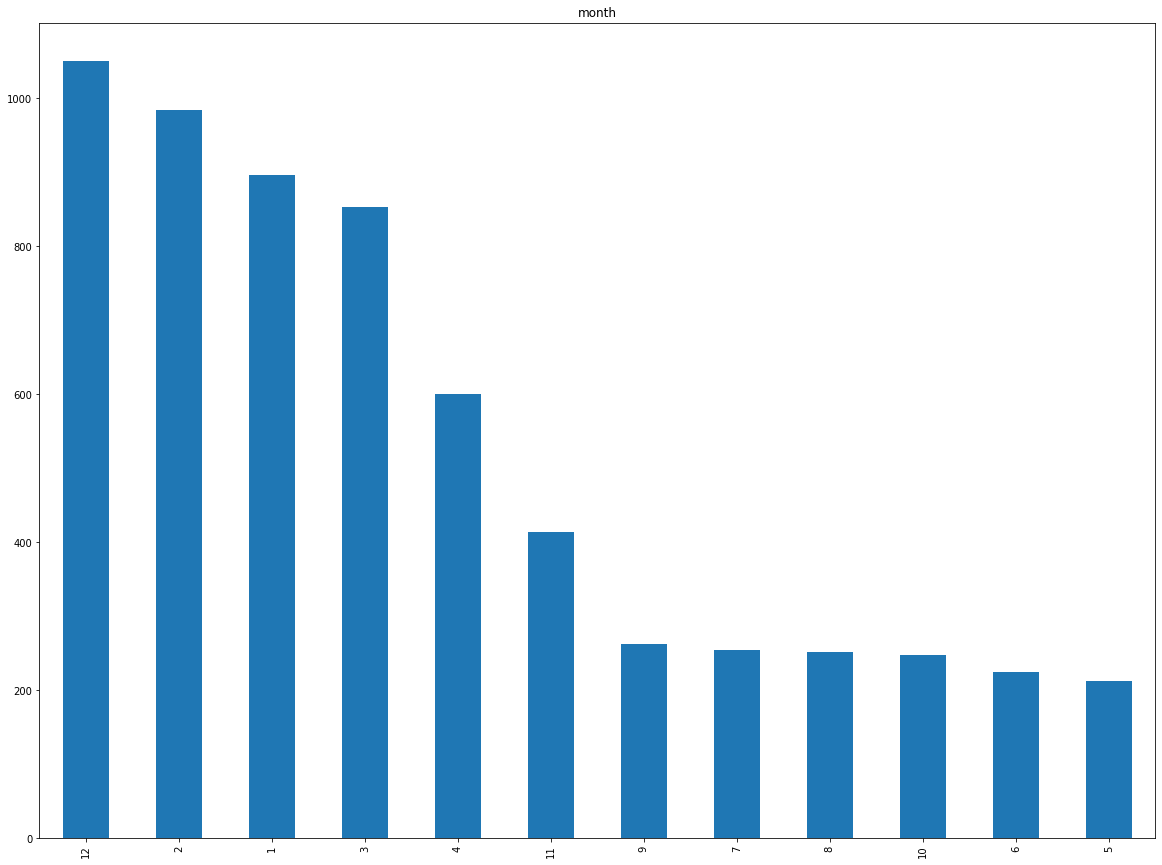

In [37]:
plt.subplots(figsize=(20,15))
transport_df['month'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title('month')

Text(0.5, 1.0, 'day')

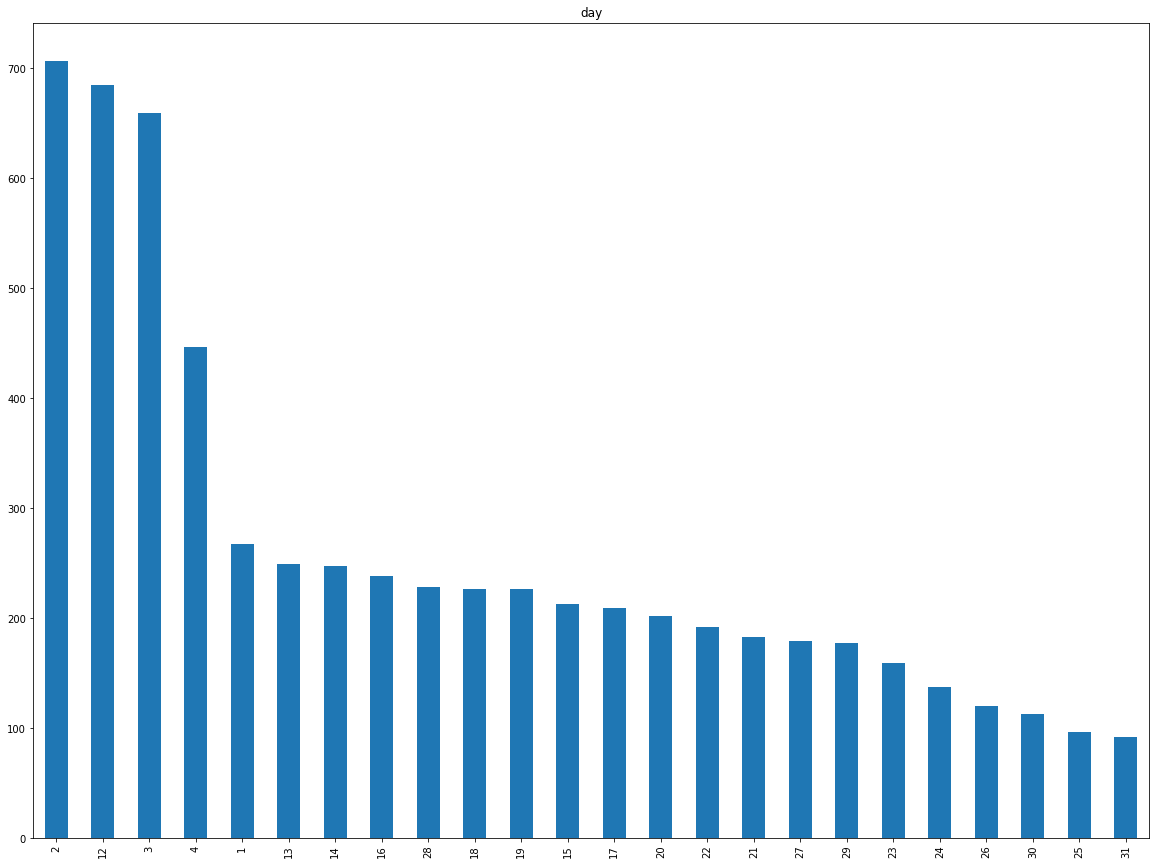

In [38]:
plt.subplots(figsize=(20,15))
transport_df['day'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title('day')

In [ ]:
plt.subplots(figsize=(20,15))
transport_df['day'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title('day')

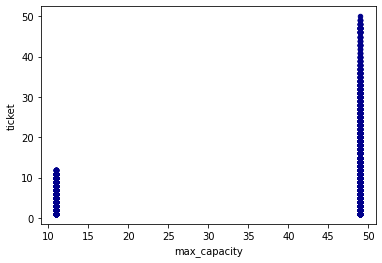

In [39]:
ax2 = transport_df.plot.scatter(y='ticket',
                      x='max_capacity',
                       c='DarkBlue')

In [ ]:
ts.between_time('0:15', '0:45')